# We are analyzing the sales data of ecommece site 

### Table of content
1. Importing required libraries
2. Merge data from each month into one CSV
3. Read in updated dataframe
4. cleaning data
    - 4.1 - Dropping rows with NaN
    - 4.2 - Removing duplicate rows
5. Adding additional column to the data  
    - 5.1 - Adding month column
    - 5.2 - Adding Sales column
6. To find what is the best month for sales
7. Which city sold major product
8. what time should we display advertisement to manimize the likelyhood of customers buying product
9. what product is most offen sold together
10. What product is sold the most and why do you think it sold the most

###  1 - Importing required libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os                       # os library is used to import set of csv files in one go

### 2 -  Merge data from each month into one CSV

In [24]:
files = [file for file in os.listdir('./Sales_Data')]   # importing file names from  a folder to list

df = pd.DataFrame()

for file in files:
    df1 = pd.read_csv('./Sales_Data/'+ file)
    df = pd.concat([df,df1])                   # merging dataset
    
df.to_csv("all_data.csv",index = False)        # creating a copy of merged dataset

### 3 -  Read in updated dataframe

In [25]:
df = pd.read_csv('all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### 4 - cleaning data
####  4.1 - Dropping rows with NaN

In [26]:
df[df.isna().any(axis=1)].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


#### we can see those are full empty rows so we can safely delete those rows using dropna() function


In [27]:
df.dropna(how = 'all',inplace = True)

In [28]:
df['Quantity Ordered'].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

#### we can see that other than numeric there is a text "Quantity Ordered" on further exploring it is found that 355 rows were having the record same as column name. That should be removed

----
###  4.2 - Removing duplicate rows

In [29]:
df = df[df['Quantity Ordered'].str[0:2] != 'Qu']
# Now rows which contains'Or' in the Month column is removed
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [30]:

df['Quantity Ordered'].value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

#### Now we can see that Quantity Ordered is removed 
___
___



---
###  5 - Adding additional column to the data
____
####  5.1 - Adding month column

In [31]:
df['Month'] = df['Order Date'].str[0:2]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


###  Converting Data-types (String to Numeric)

### Also convert other columns with correct datatype

In [32]:
df['Quantity Ordered'] =  pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])


In [33]:
# Now lets change the data type of Month column
df.Month = df['Month'].astype('int32')
df.Month.value_counts()

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: Month, dtype: int64

### 5.2 - Adding Sales column

In [34]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


_______
### 6 -  To find what is the best month for sales

In [35]:
groupby_month = df.groupby('Month').sum().reset_index()

groupby_month.head()

,Month,Quantity Ordered,Price Each,Sales
0,1,10903,1811768.38,1822256.73
1,2,13449,2188884.72,2202022.42
2,3,17005,2791207.83,2807100.38
3,4,20558,3367671.02,3390670.24
4,5,18667,3135125.13,3152606.75


[Text(0.5, 1.0, 'sales / month')]

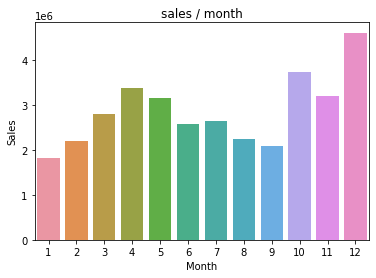

In [36]:
sns.barplot(data = groupby_month, x = "Month",y = "Sales").set(title = "sales / month")


### summary of the chart
#### It looks like December is making better sales than any other month
______
______

### 7 -   Which city sold major product

In [37]:
df['City'] = df['Purchase Address'].apply(lambda x : x.split(',')[1])
df['State'] = df['Purchase Address'].apply(lambda x : x.split( ',')[-1][1:3])
df["City"] = df["City"] +' '+ df['State']

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,CA


In [38]:
df.City.value_counts() 

 San Francisco CA    44732
 Los Angeles CA      29605
 New York City NY    24876
 Boston MA           19934
 Atlanta GA          14881
 Dallas TX           14820
 Seattle WA          14732
 Portland OR         10010
 Austin TX            9905
 Portland ME          2455
Name: City, dtype: int64

In [39]:
groupby_city = df.groupby('City').sum().reset_index()

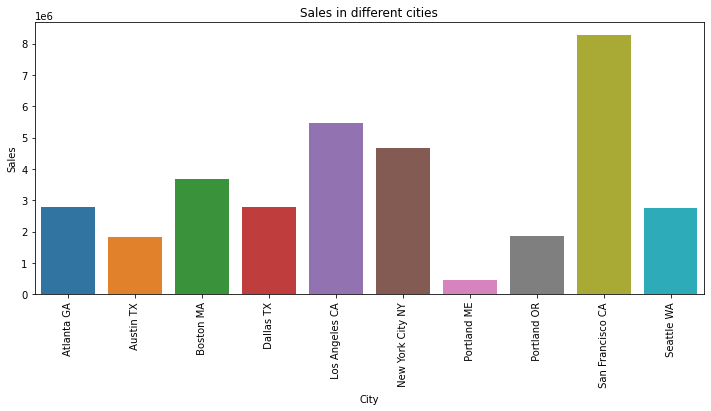

In [40]:
plt.figure(figsize=(12,5))
sns.barplot(data = groupby_city, x = 'City', y= 'Sales').set(title = 'Sales in different cities')
plt.xticks(rotation=90)
plt.show()

### summary of the chart
#### San Francisco is making better sales than any other city

_________
_________
### 8 -     what time should we display advertisement to manimize the likelyhood of customers buying product 

In [41]:
# converting order date column from string to datetime datatype
df['Order Date'] = pd.to_datetime(df['Order Date']) 

In [42]:
df['hour'] = df['Order Date'].dt.hour

In [43]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,CA,9


In [44]:
groupby_hour = df.groupby('hour').count()['Product'].reset_index()
groupby_hour.head()

,hour,Product
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854


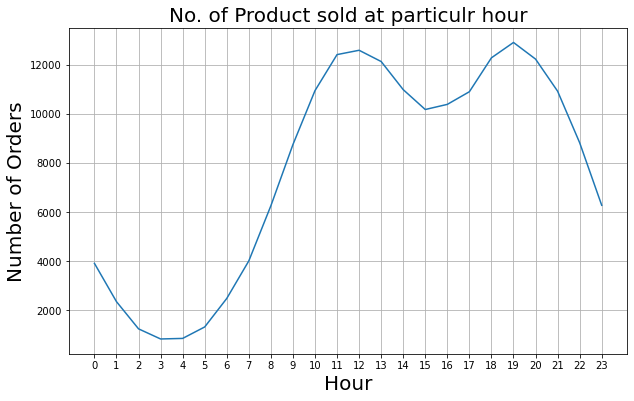

In [45]:
plt.figure(figsize=(10,6))
sns.lineplot(data = groupby_hour, x = 'hour', y ='Product')
plt.xticks(np.arange(24))
plt.xlabel('Hour' , size =20)
plt.ylabel('Number of Orders' , size =20)
plt.title("No. of Product sold at particulr hour", size =20)
plt.grid()

### summary of the chart
#### This chart shows that the number of orders is at peak at (11 to 12)hrs and (18 to 20)hrs. advertising sometime before and during this time slot may increse tottal numer of orders
#### Further we can also drill down to city wise and formulate the advertising time accordingly

_________
_______
### 9 -  what product is most offen sold together

In [46]:
# create a grouped column which contains multiple items bought by same user

df['Grouped'] = df.groupby(['Order ID','Order Date'])['Product'].transform(lambda x: ','.join(x))

# filter the rows with repeted order ID

df_dup =df[df['Order ID']. duplicated(keep =False)]

# Dropping duplicates based on their Order ID and Grouped column

df_dup = df_dup[['Order ID','Grouped']].drop_duplicates()
df_dup.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [47]:
groupby_grouped = df_dup.groupby('Grouped').count().reset_index()
groupby_grouped.rename(columns = {'Order ID' : 'Count'},inplace = True)
groupby_grouped.sort_values('Count',ascending = False).head(10)


,Grouped,Count
342,"iPhone,Lightning Charging Cable",882
173,"Google Phone,USB-C Charging Cable",856
363,"iPhone,Wired Headphones",361
299,"Vareebadd Phone,USB-C Charging Cable",312
191,"Google Phone,Wired Headphones",303
334,"iPhone,Apple Airpods Headphones",286
163,"Google Phone,Bose SoundSport Headphones",161
305,"Vareebadd Phone,Wired Headphones",104
184,"Google Phone,USB-C Charging Cable,Wired Headph...",77
292,"Vareebadd Phone,Bose SoundSport Headphones",60


In [48]:
df_dup["product1"] = df_dup["Grouped"].apply(lambda x: x.split(',')[0])
df_dup["product2"] = df_dup["Grouped"].apply(lambda x: x.split(',')[1])
df_dup['count'] = 1

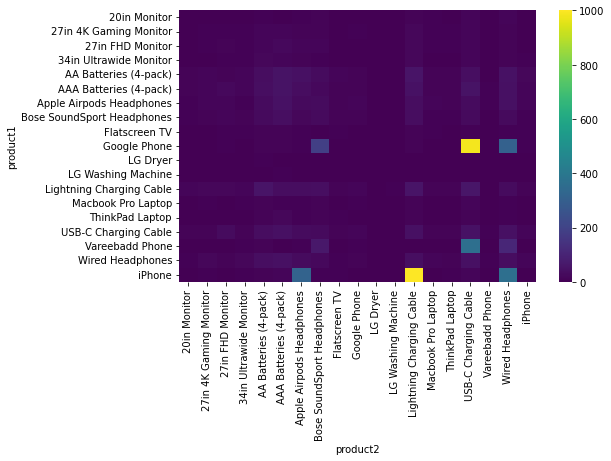

In [49]:
pivot_prod = df_dup.pivot_table(index = 'product1', columns = 'product2', values = 'count',aggfunc='count').fillna(0)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_prod,cmap = 'viridis')
plt.show()

#### These are the list of items bought together. this analysis can be used to suggesting customer during the purchase
#### This will be very useful for recommending the customer for buying additional product

___
____
## 10 : What product is sold the most and why do you think it sold the most?

In [50]:
# creating a new table which contains product name, total quantity ordered and its unit price
product_group = df.groupby('Product').sum()['Quantity Ordered'].reset_index()

prices = df.groupby('Product').mean()['Price Each'].reset_index()

#merging product_group table to prices table
prices['Quantity Ordered'] = product_group['Quantity Ordered']
prices.head()

,Product,Price Each,Quantity Ordered
0,20in Monitor,109.99,4129
1,27in 4K Gaming Monitor,389.99,6244
2,27in FHD Monitor,149.99,7550
3,34in Ultrawide Monitor,379.99,6199
4,AA Batteries (4-pack),3.84,27635


C:\Users\Karthik\AppData\Local\Temp/ipykernel_15132/2344188495.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation = 90,size =15)
C:\Users\Karthik\AppData\Local\Temp/ipykernel_15132/2344188495.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(Quantity,size =15)
C:\Users\Karthik\AppData\Local\Temp/ipykernel_15132/2344188495.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(price,size =15)


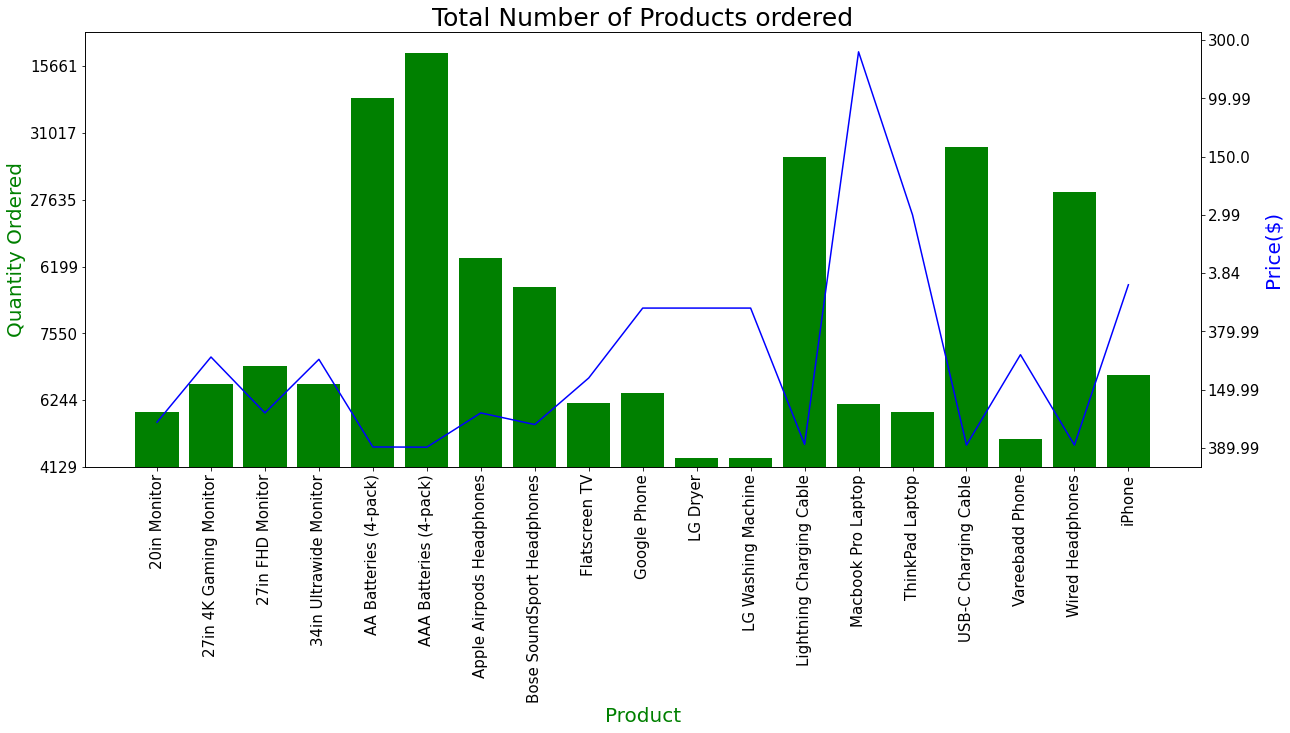

In [51]:
# crating a list of elements from the coloumns of table price

product = list(prices.Product)
price = list(prices['Price Each'])
Quantity = list(prices['Quantity Ordered'])


fig,ax1 = plt.subplots(figsize=(20,8))


ax2 = ax1.twinx()
ax1.bar(product, Quantity,color = 'g')
ax2.plot(product, price,'b-', )

ax1.set_xticklabels(product,rotation = 90,size =15)
ax1.set_yticklabels(Quantity,size =15)
ax2.set_yticklabels(price,size =15)
ax1.set_ylabel('Quantity Ordered',size =20, color = 'g')
ax1.set_xlabel('Product',size =20, color = 'g')
ax2.set_ylabel('Price($)',size =20, color = 'b')
plt.title("Total Number of Products ordered",size =25)
plt.show()

### Summary
____
####  Here in the chart it is evident that Batteries, Charging cabel and Head phones where in the top of list in quantity order, possible reasons are
#### -->  Price of these products were cheaper when compared to other items in the list
#### -->  These products were get used quickly (i.e) Batteries or wornout quickly (i.e) headphones and cabels
#### -->  These products were used by every induvidual where as products like TV, Dryer, Washing machines bought by a family  